In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def replace_name(name: str):
    if name == "MCDLSTM":
        return "MCD-LSTM"
    if name == "MCD":
        return "MCD-LSTM"
    if name == "LSTMQ":
        return "LSTM-Q"
    if name == "LSTM":
        return "C-LSTM"
    return name

<h3>Plots scenario 22</h3>

In [48]:
df_scenario_22_results = pd.read_csv("scenarios/scenario_22_results.csv")
df_scenario_22_results['model'] = df_scenario_22_results['model'].apply(replace_name)

df_success = pd.read_csv("success_table.csv")
df_success = df_success[df_success["model"] != "baseline_c"].copy()
df_success['model'] = df_success['model'].apply(replace_name)

In [49]:
models = ["MCD-LSTM", "HBNN", "HBNN++", "C-LSTM", "oracle", "LSTM-Q", "PROPHET"]
df_success['model'] = df_success['model'].str.replace('MCDLSTM','MCD')
all_qos = df_success["qos"].unique()
d = {"model": ["oracle" for i in range(len(all_qos))],
     "qos": all_qos,
     "SR": [1 for i in range(len(all_qos))],
     "UP": [0 for i in range(len(all_qos))],
     "OP": [0 for i in range(len(all_qos))]}
df_base_a = pd.DataFrame(data=d)
df_success = pd.concat([df_success, df_base_a], ignore_index=True, axis=0)
df_success.reset_index(inplace=True, drop=True)

In [50]:
scenarios_results = {}
for qos in df_scenario_22_results.qos.unique():
    df_scen = df_scenario_22_results[df_scenario_22_results["qos"] == qos].copy()
    max_cost = float(df_scen[df_scen["model"] == "naive"]["energy_cost"])
    df_scen["savings (%)"] = df_scen.apply(lambda row: 100 - row["energy_cost"]/max_cost*100, axis=1)
    scenarios_results[qos] = df_scen

In [51]:
qos_values = []
savings_values = []
model_values = []
succ_values = []
op_values = []
up_values = []
for qos in scenarios_results:
    df_scen = scenarios_results[qos]
    df_scen = df_scen[df_scen["model"].isin(models)].copy()
    df_scen.sort_values(by="model",axis=0, inplace=True)
    df_succ = df_success[df_success["qos"] == qos]
    df_succ.sort_values(by="model",axis=0, inplace=True)

    savings_values.extend(df_scen["savings (%)"].values)
    qos_values.extend(df_scen["qos"].values)
    model_values.extend(df_scen["model"].values)
    succ_values.extend(df_succ["SR"].values)
    op_values.extend(df_succ["OP"].values)
    up_values.extend(df_succ["UP"].values)
d = {"qos": qos_values,
     "model": model_values,
     "savings": savings_values,
     "SR": succ_values,
     "OP": op_values,
     "UP": up_values,
     }
df_plot = pd.DataFrame(data=d)

/home/diego/miniconda3/envs/workloadpred/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


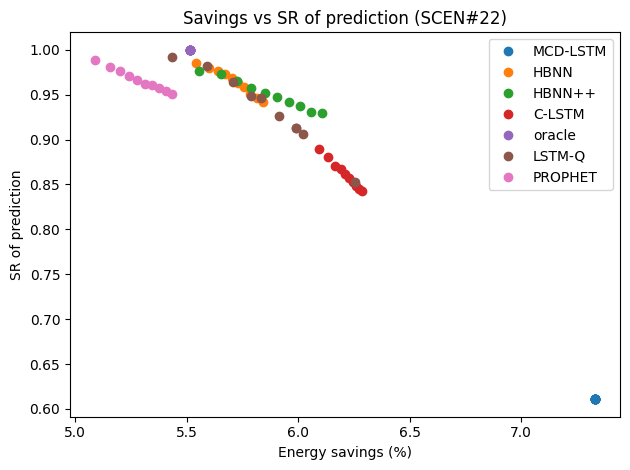

In [52]:
# build plot
%matplotlib inline
fig, ax = plt.subplots()
ax.set_title("Savings vs SR of prediction (SCEN#22)")
ax.set_xlabel("Energy savings (%)")
ax.set_ylabel("SR of prediction")
for model in models:
    df_model = df_plot[df_plot["model"] == model].copy()
    df_model.sort_values(by="qos", ascending=True, inplace=True)
    qos_values = df_model.qos
    savings_values = df_model.savings
    succ_values = df_model.SR
    ax.plot(savings_values, succ_values, 'o', label=model)

ax.legend()
plt.tight_layout()
# plt.savefig('scenarios/plots/scenario_22.png')
plt.savefig('scenarios/plots/scenario_22.eps', format='eps')
plt.show()

<h3>Plots scenario 33</h3>

In [37]:
df_scenario_33_results = pd.read_csv("scenarios/scenario_33_results.csv")
df_scenario_33_results['model'] = df_scenario_33_results['model'].apply(replace_name)

df_success = pd.read_csv("success_table.csv")
df_success = df_success[df_success["model"] != "baseline_c"].copy()
df_success['model'] = df_success['model'].apply(replace_name)

In [39]:
models = ["MCD-LSTM", "HBNN", "HBNN++", "C-LSTM", "oracle", "LSTM-Q", "PROPHET"]
all_qos = df_success["qos"].unique()
d = {"model": ["oracle" for i in range(len(all_qos))],
     "qos": all_qos,
     "SR": [1 for i in range(len(all_qos))],
     "UP": [0 for i in range(len(all_qos))],
     "OP": [0 for i in range(len(all_qos))]}
df_base_a = pd.DataFrame(data=d)
df_success = pd.concat([df_success, df_base_a], ignore_index=True, axis=0)
df_success.reset_index(inplace=True, drop=True)

In [40]:
scenarios_results = {}
for qos in df_scenario_33_results.qos.unique():
    df_scen = df_scenario_33_results[df_scenario_33_results["qos"] == qos].copy()
    max_cost = float(df_scen[df_scen["model"] == "naive"]["energy_cost"])
    df_scen["savings (%)"] = df_scen.apply(lambda row: 100 - row["energy_cost"]/max_cost*100, axis=1)
    scenarios_results[qos] = df_scen

In [41]:
qos_values = []
savings_values = []
model_values = []
succ_values = []
op_values = []
up_values = []
for qos in scenarios_results:
    df_scen = scenarios_results[qos]
    df_scen = df_scen[df_scen["model"].isin(models)].copy()
    df_scen.sort_values(by="model",axis=0, inplace=True)
    df_succ = df_success[df_success["qos"] == qos]
    df_succ.sort_values(by="model",axis=0, inplace=True)

    savings_values.extend(df_scen["savings (%)"].values)
    qos_values.extend(df_scen["qos"].values)
    model_values.extend(df_scen["model"].values)
    succ_values.extend(df_succ["SR"].values)
    op_values.extend(df_succ["OP"].values)
    up_values.extend(df_succ["UP"].values)
d = {"qos": qos_values,
     "model": model_values,
     "savings": savings_values,
     "SR": succ_values,
     "OP": op_values,
     "UP": up_values,
     }
df_plot = pd.DataFrame(data=d)

/home/diego/miniconda3/envs/workloadpred/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


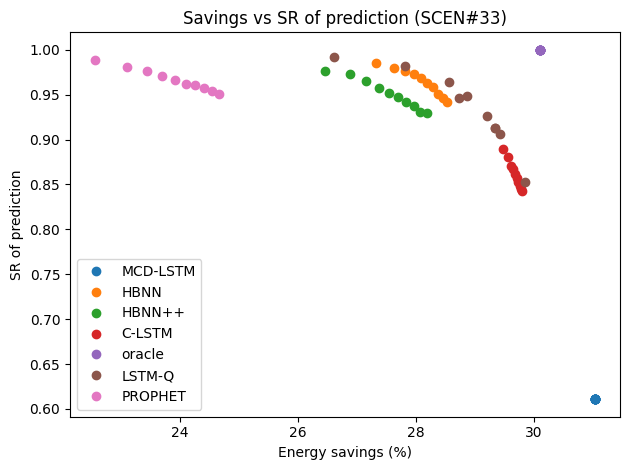

In [42]:
# build plot
%matplotlib inline
fig, ax = plt.subplots()
ax.set_title("Savings vs SR of prediction (SCEN#33)")
ax.set_xlabel("Energy savings (%)")
ax.set_ylabel("SR of prediction")
for model in models:
    df_model = df_plot[df_plot["model"] == model].copy()
    df_model.sort_values(by="qos", ascending=True, inplace=True)
    qos_values = df_model.qos
    savings_values = df_model.savings
    succ_values = df_model.SR
    ax.plot(savings_values, succ_values, 'o', label=model)

ax.legend()
plt.tight_layout()
# plt.savefig('scenarios/plots/scenario_33.png')
plt.savefig('scenarios/plots/scenario_33.eps', format='eps')
plt.show()

<h3>Plots scenario 1</h3>

In [48]:
df_scenario_1_results = pd.read_csv("scenarios/scenario_1_results.csv")
df_success = pd.read_csv("success_table.csv")
df_scenario_1_results = df_scenario_1_results[df_scenario_1_results["model"] != "baseline_c"].copy()
df_scenario_1_results.columns

Index(['qos', 'model', 'tot_energy', 'savings (%)'], dtype='object')

In [49]:
df_success.model.unique()

array(['MCDLSTM', 'HBNN', 'HBNN++', 'LSTMQ', 'LSTM', 'PROPHET'],
      dtype=object)

In [50]:
df_success['model'] = df_success['model'].str.replace('MCDLSTM','MCD')
all_qos = df_success["qos"].unique()
d = {"model": ["oracle" for i in range(len(all_qos))],
     "qos": all_qos,
     "SR": [1 for i in range(len(all_qos))],
     "UP": [0 for i in range(len(all_qos))],
     "OP": [0 for i in range(len(all_qos))]}
df_base_a = pd.DataFrame(data=d)
df_success = pd.concat([df_success, df_base_a], ignore_index=True, axis=0)
df_success.reset_index(inplace=True, drop=True)

In [51]:
models = ["MCD", "HBNN", "HBNN++", "LSTM", "oracle", "LSTMQ", "PROPHET"]
qos_values = []
savings_values = []
model_values = []
succ_values = []
op_values = []
up_values = []
for qos in df_scenario_1_results.qos:
    df_scen = df_scenario_1_results[df_scenario_1_results["qos"] == qos]
    df_scen = df_scen[df_scen["model"].isin(models)].copy()
    df_scen.sort_values(by="model",axis=0, inplace=True)
    df_succ = df_success[df_success["qos"] == qos]
    df_succ.sort_values(by="model",axis=0, inplace=True)

    savings_values.extend(df_scen["savings (%)"].values)
    qos_values.extend(df_scen["qos"].values)
    model_values.extend(df_scen["model"].values)
    succ_values.extend(df_succ["SR"].values)
    op_values.extend(df_succ["OP"].values)
    up_values.extend(df_succ["UP"].values)
d = {"qos": qos_values,
     "model": model_values,
     "savings": savings_values,
     "SR": succ_values,
     "OP": op_values,
     "UP": up_values,
     }
df_plot = pd.DataFrame(data=d)

/home/diego/miniconda3/envs/workloadpred/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


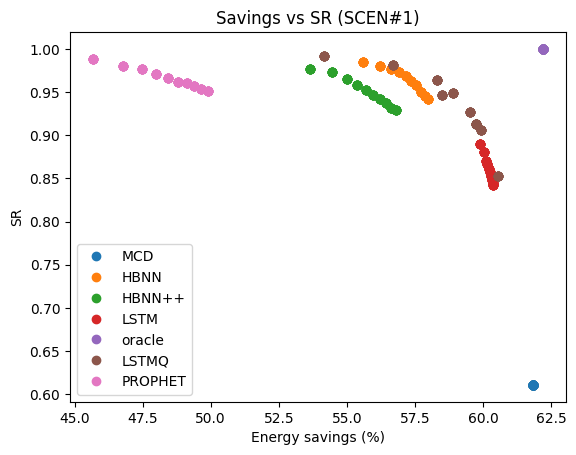

In [52]:
# build plot
fig, ax = plt.subplots()
ax.set_title("Savings vs SR (SCEN#1)")
ax.set_xlabel("Energy savings (%)")
ax.set_ylabel("SR")
for model in models:
    df_model = df_plot[df_plot["model"] == model].copy()
    df_model.sort_values(by="qos", ascending=True, inplace=True)
    qos_values = df_model.qos
    savings_values = df_model.savings
    succ_values = df_model.SR
    ax.plot(savings_values, succ_values, 'o', label=model)

ax.legend()
plt.show()

<h3>Plots scenario 2</h3>

In [82]:
df_scenario_2_results = pd.read_csv("scenarios/scenario_2_results.csv")
df_success = pd.read_csv("success_table.csv")
df_scenario_2_results.columns

Index(['qos', 'model', 'energy_cost'], dtype='object')

In [83]:
models = ["MCD", "HBNN", "HBNN++", "LSTM", "oracle", "LSTMQ", "PROPHET"]
df_success['model'] = df_success['model'].str.replace('MCDLSTM','MCD')
all_qos = df_success["qos"].unique()
d = {"model": ["oracle" for i in range(len(all_qos))],
     "qos": all_qos,
     "SR": [1 for i in range(len(all_qos))],
     "UP": [0 for i in range(len(all_qos))],
     "OP": [0 for i in range(len(all_qos))]}
df_base_a = pd.DataFrame(data=d)
df_success = pd.concat([df_success, df_base_a], ignore_index=True, axis=0)
df_success.reset_index(inplace=True, drop=True)

In [84]:
scenarios_results = {}
for qos in df_scenario_2_results.qos.unique():
    df_scen = df_scenario_2_results[df_scenario_2_results["qos"] == qos].copy()
    max_cost = float(df_scen[df_scen["model"] == "naive"]["energy_cost"])
    df_scen["savings (%)"] = df_scen.apply(lambda row: 100 - row["energy_cost"]/max_cost*100, axis=1)
    scenarios_results[qos] = df_scen

In [85]:
qos_values = []
savings_values = []
model_values = []
succ_values = []
op_values = []
up_values = []
for qos in scenarios_results:
    df_scen = scenarios_results[qos]
    df_scen = df_scen[df_scen["model"].isin(models)].copy()
    df_scen.sort_values(by="model",axis=0, inplace=True)
    df_succ = df_success[df_success["qos"] == qos]
    df_succ.sort_values(by="model",axis=0, inplace=True)

    savings_values.extend(df_scen["savings (%)"].values)
    qos_values.extend(df_scen["qos"].values)
    model_values.extend(df_scen["model"].values)
    succ_values.extend(df_succ["SR"].values)
    op_values.extend(df_succ["OP"].values)
    up_values.extend(df_succ["UP"].values)
d = {"qos": qos_values,
     "model": model_values,
     "savings": savings_values,
     "SR": succ_values,
     "OP": op_values,
     "UP": up_values,
     }
df_plot = pd.DataFrame(data=d)

/home/diego/miniconda3/envs/workloadpred/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


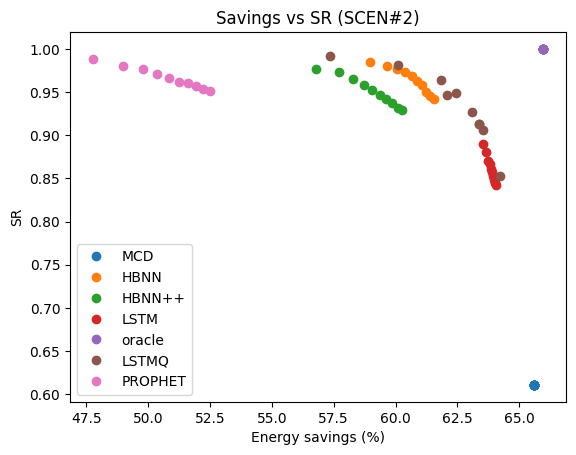

In [70]:
# build plot
fig, ax = plt.subplots()
ax.set_title("Savings vs SR (SCEN#2)")
ax.set_xlabel("Energy savings (%)")
ax.set_ylabel("SR")
for model in models:
    df_model = df_plot[df_plot["model"] == model].copy()
    df_model.sort_values(by="qos", ascending=True, inplace=True)
    qos_values = df_model.qos
    savings_values = df_model.savings
    succ_values = df_model.SR
    ax.plot(savings_values, succ_values, 'o', label=model)

ax.legend()
plt.show()

<h3>Plots scenario 3</h3>

In [99]:
df_scenario_3_results = pd.read_csv("scenarios/scenario_3_results.csv")
df_success = pd.read_csv("success_table.csv")
df_scenario_3_results.columns

Index(['qos', 'model', 'energy_cost'], dtype='object')

In [100]:
models = ["MCD", "HBNN", "HBNN++", "LSTM", "oracle", "LSTMQ", "PROPHET"]
df_success['model'] = df_success['model'].str.replace('MCDLSTM','MCD')
all_qos = df_success["qos"].unique()
d = {"model": ["oracle" for i in range(len(all_qos))],
     "qos": all_qos,
     "SR": [1 for i in range(len(all_qos))],
     "UP": [0 for i in range(len(all_qos))],
     "OP": [0 for i in range(len(all_qos))]}
df_base_a = pd.DataFrame(data=d)
df_success = pd.concat([df_success, df_base_a], ignore_index=True, axis=0)
df_success.reset_index(inplace=True, drop=True)

In [101]:
scenarios_results = {}
for qos in df_scenario_3_results.qos.unique():
    df_scen = df_scenario_3_results[df_scenario_3_results["qos"] == qos].copy()
    max_cost = float(df_scen[df_scen["model"] == "naive"]["energy_cost"])
    df_scen["savings (%)"] = df_scen.apply(lambda row: 100 - row["energy_cost"]/max_cost*100, axis=1)
    scenarios_results[qos] = df_scen

In [102]:
qos_values = []
savings_values = []
model_values = []
succ_values = []
op_values = []
up_values = []
for qos in scenarios_results:
    df_scen = scenarios_results[qos]
    df_scen = df_scen[df_scen["model"].isin(models)].copy()
    df_scen.sort_values(by="model",axis=0, inplace=True)
    df_succ = df_success[df_success["qos"] == qos]
    df_succ.sort_values(by="model",axis=0, inplace=True)

    savings_values.extend(df_scen["savings (%)"].values)
    qos_values.extend(df_scen["qos"].values)
    model_values.extend(df_scen["model"].values)
    succ_values.extend(df_succ["SR"].values)
    op_values.extend(df_succ["OP"].values)
    up_values.extend(df_succ["UP"].values)
d = {"qos": qos_values,
     "model": model_values,
     "savings": savings_values,
     "SR": succ_values,
     "OP": op_values,
     "UP": up_values,
     }
df_plot = pd.DataFrame(data=d)

/home/diego/miniconda3/envs/workloadpred/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


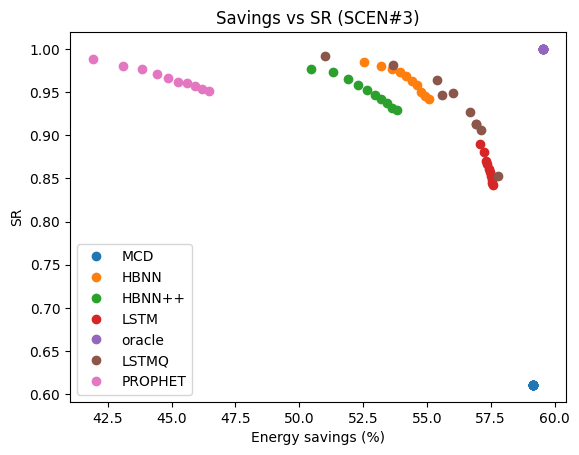

In [103]:
# build plot
fig, ax = plt.subplots()
ax.set_title("Savings vs SR (SCEN#3)")
ax.set_xlabel("Energy savings (%)")
ax.set_ylabel("SR")
for model in models:
    df_model = df_plot[df_plot["model"] == model].copy()
    df_model.sort_values(by="qos", ascending=True, inplace=True)
    qos_values = df_model.qos
    savings_values = df_model.savings
    succ_values = df_model.SR
    ax.plot(savings_values, succ_values, 'o', label=model)

ax.legend()
plt.show()

<h3>Plots scenario 4</h3>

In [154]:
df_scenario_4_results = pd.read_csv("scenarios/scenario_4_results.csv")
df_success = pd.read_csv("success_table.csv")
df_scenario_4_results.columns

Index(['qos', 'model', 'energy_cost'], dtype='object')

In [155]:
models = ["MCD", "HBNN", "HBNN++", "LSTM", "oracle", "LSTMQ", "PROPHET"]
df_success['model'] = df_success['model'].str.replace('MCDLSTM','MCD')
all_qos = df_success["qos"].unique()
d = {"model": ["oracle" for i in range(len(all_qos))],
     "qos": all_qos,
     "SR": [1 for i in range(len(all_qos))],
     "UP": [0 for i in range(len(all_qos))],
     "OP": [0 for i in range(len(all_qos))]}
df_base_a = pd.DataFrame(data=d)
df_success = pd.concat([df_success, df_base_a], ignore_index=True, axis=0)
df_success.reset_index(inplace=True, drop=True)

In [156]:
scenarios_results = {}
for qos in df_scenario_4_results.qos.unique():
    df_scen = df_scenario_4_results[df_scenario_4_results["qos"] == qos].copy()
    max_cost = float(df_scen[df_scen["model"] == "naive"]["energy_cost"])
    df_scen["savings (%)"] = df_scen.apply(lambda row: 100 - row["energy_cost"]/max_cost*100, axis=1)
    scenarios_results[qos] = df_scen

In [157]:
qos_values = []
savings_values = []
model_values = []
succ_values = []
op_values = []
up_values = []
for qos in scenarios_results:
    df_scen = scenarios_results[qos]
    df_scen = df_scen[df_scen["model"].isin(models)].copy()
    df_scen.sort_values(by="model",axis=0, inplace=True)
    df_succ = df_success[df_success["qos"] == qos]
    df_succ.sort_values(by="model",axis=0, inplace=True)

    savings_values.extend(df_scen["savings (%)"].values)
    qos_values.extend(df_scen["qos"].values)
    model_values.extend(df_scen["model"].values)
    succ_values.extend(df_succ["SR"].values)
    op_values.extend(df_succ["OP"].values)
    up_values.extend(df_succ["UP"].values)
d = {"qos": qos_values,
     "model": model_values,
     "savings": savings_values,
     "SR": succ_values,
     "OP": op_values,
     "UP": up_values,
     }
df_plot = pd.DataFrame(data=d)

/home/diego/miniconda3/envs/workloadpred/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [158]:
# build plot
fig, ax = plt.subplots()
ax.set_title("Savings vs SR (SCEN#4)")
ax.set_xlabel("Energy savings (%)")
ax.set_ylabel("SR")
for model in models:
    df_model = df_plot[df_plot["model"] == model].copy()
    df_model.sort_values(by="qos", ascending=True, inplace=True)
    qos_values = df_model.qos
    savings_values = df_model.savings
    succ_values = df_model.SR
    ax.plot(savings_values, succ_values, 'o', label=model)

ax.legend()
plt.savefig('scenarios/plots/scenario_4.png')
plt.show()

<h3>Plots scenario 11: Bonus</h3>

In [6]:
df_scenario_11_results = pd.read_csv("scenarios/scenario_11_results.csv")
df_success = pd.read_csv("success_table.csv")
df_scenario_11_results.columns

Index(['qos', 'model', 'energy_cost'], dtype='object')

In [7]:
models = ["MCD", "HBNN", "HBNN++", "LSTM", "oracle", "LSTMQ", "PROPHET"]
df_success['model'] = df_success['model'].str.replace('MCDLSTM','MCD')
all_qos = df_success["qos"].unique()
d = {"model": ["oracle" for i in range(len(all_qos))],
     "qos": all_qos,
     "SR": [1 for i in range(len(all_qos))],
     "UP": [0 for i in range(len(all_qos))],
     "OP": [0 for i in range(len(all_qos))]}
df_base_a = pd.DataFrame(data=d)
df_success = pd.concat([df_success, df_base_a], ignore_index=True, axis=0)
df_success.reset_index(inplace=True, drop=True)

In [8]:
scenarios_results = {}
for qos in df_scenario_11_results.qos.unique():
    df_scen = df_scenario_11_results[df_scenario_11_results["qos"] == qos].copy()
    max_cost = float(df_scen[df_scen["model"] == "naive"]["energy_cost"])
    df_scen["savings (%)"] = df_scen.apply(lambda row: 100 - row["energy_cost"]/max_cost*100, axis=1)
    scenarios_results[qos] = df_scen

In [9]:
qos_values = []
savings_values = []
model_values = []
succ_values = []
op_values = []
up_values = []
for qos in scenarios_results:
    df_scen = scenarios_results[qos]
    df_scen = df_scen[df_scen["model"].isin(models)].copy()
    df_scen.sort_values(by="model",axis=0, inplace=True)
    df_succ = df_success[df_success["qos"] == qos]
    df_succ.sort_values(by="model",axis=0, inplace=True)

    savings_values.extend(df_scen["savings (%)"].values)
    qos_values.extend(df_scen["qos"].values)
    model_values.extend(df_scen["model"].values)
    succ_values.extend(df_succ["SR"].values)
    op_values.extend(df_succ["OP"].values)
    up_values.extend(df_succ["UP"].values)
d = {"qos": qos_values,
     "model": model_values,
     "savings": savings_values,
     "SR": succ_values,
     "OP": op_values,
     "UP": up_values,
     }
df_plot = pd.DataFrame(data=d)

/home/diego/miniconda3/envs/workloadpred/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


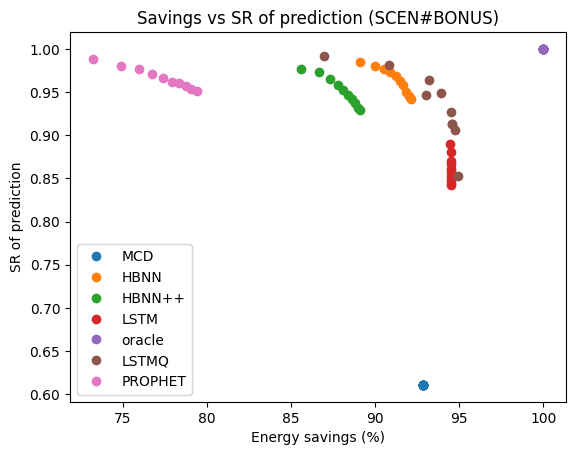

In [10]:
# build plot
fig, ax = plt.subplots()
ax.set_title("Savings vs SR of prediction (SCEN#BONUS)")
ax.set_xlabel("Energy savings (%)")
ax.set_ylabel("SR of prediction")
for model in models:
    df_model = df_plot[df_plot["model"] == model].copy()
    df_model.sort_values(by="qos", ascending=True, inplace=True)
    qos_values = df_model.qos
    savings_values = df_model.savings
    succ_values = df_model.SR
    ax.plot(savings_values, succ_values, 'o', label=model)

ax.legend()
plt.savefig('scenarios/plots/scenario_bonus.png')
plt.show()

In [160]:
df_accuracy = pd.read_csv("accuracy_table.csv")
df_accuracy[df_accuracy["qos"] == "NO_QOS"]

,model,qos,mse,mae
0,MCDLSTM,NO_QOS,0.002068,0.033906
11,HBNN,NO_QOS,0.005863,0.055079
22,HBNN++,NO_QOS,0.009376,0.075565
33,LSTMQ,NO_QOS,0.007061,0.075317
44,LSTM,NO_QOS,0.003293,0.042351
55,PROPHET,NO_QOS,0.033492,0.149780
